# GERG 

In the GERG-2004 and GERG-2008 models, the pure fluids are modeled with high-accuracy multiparameter EOS. The model is covered exhaustively in the GERG-2004 monograph: https://www.gerg.eu/wp-content/uploads/2019/10/TM15.pdf  and in the GERG-2008 paper: https://doi.org/10.1021/je300655b

The following components are supported (case-sensitive) in GERG-2004:

* methane
* nitrogen
* carbondioxide
* ethane
* propane
* n-butane
* isobutane
* n-pentane
* isopentane
* n-hexane
* n-heptane
* n-octane
* hydrogen
* oxygen
* carbonmonoxide
* water
* helium
* argon

and GERG-2008 adds the components:

* hydrogensulfide
* n-nonane
* n-decane

(as well as modifying the pure component EOS for carbon monoxide and isopentane). 

The interaction parameters and departure functions are not editable (by design) and the EOS parameters are hard-coded. No ancillary equations are available along with the GERG-2004 model, but you can use the on-the-fly ancillary generator of teqp.

The residual portions of these models were added in version 0.18.0, and it is planned to add the ideal-gas portions as well at a later date. The residual portion is enough for many applications like phase equilibria and critical locus tracing.

The kind is 'GERG2004resid' for the GERG-2004 residual model and 'GERG2008resid' for the GERG-2008 residual model

In [1]:
import teqp
import numpy as np
import pandas
import matplotlib.pyplot as plt

teqp.__version__

'0.18.0'

In [2]:
model = teqp.make_model({'kind':"GERG2004resid", 'model':{"names": ['methane','ethane']}})

In [3]:
# Note that names are case-sensitive; this doesn't work
model = teqp.make_model({'kind':"GERG2004resid", 'model':{"names": ['MeThAnE','ethane']}})

ValueError: Unable to load pure info forMeThAnE

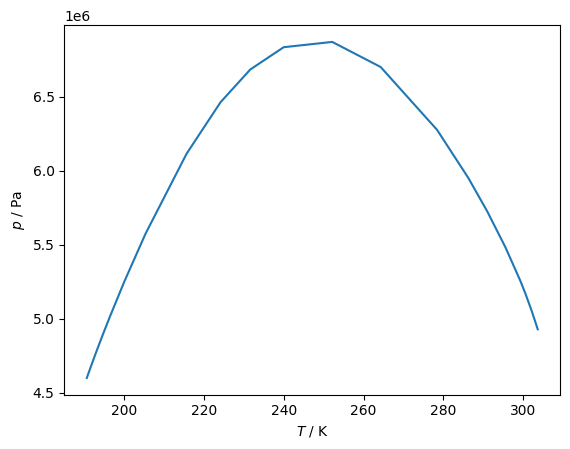

In [4]:
# Here we trace the critical locus for methane+ethane
rhovec0 = np.array([0.0, 0.0])
ifluid = 0
T0 = model.get_Tcvec()[0]
rhovec0[ifluid] = 1/model.get_vcvec()[0]
trace = model.trace_critical_arclength_binary(T0=T0, rhovec0=rhovec0)
df = pandas.DataFrame(trace)
plt.plot(df['T / K'], df['p / Pa'])
plt.gca().set(xlabel='$T$ / K', ylabel='$p$ / Pa');

In [5]:
model = teqp.make_model({'kind':"GERG2004resid", 'model':{"names": ['methane']}})

In [6]:
# Build an on-the-fly ancillary equation 
# (not as accurate as the specialized ones, but works acceptably in many cases)
anc = teqp.build_ancillaries(model, Tc=model.get_Tcvec()[0], rhoc = 1/model.get_vcvec()[0], Tmin=60)

# And then use the dynamic ancillary to calculate VLE at 100 K
T = 100 # K
rhoL, rhoV = model.pure_VLE_T(T, anc.rhoL(T), anc.rhoV(T), 10)
rhoL, rhoV, 'mol/m^3 for liquid and vapor'

(27361.12577999801, 42.046298502526746, 'mol/m^3 for liquid and vapor')